# GMM实例

In [53]:
import pandas as pd
data = pd.read_csv ('Fremont.csv', index_col='Date', parse_dates=True) #index_col:设置索引，parse_dates：尝试解析索引
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [54]:
# 数据的调用
len(data.index)
print(data.iloc[1], data.loc['2012-10-03 01:00:00'])

Fremont Bridge West Sidewalk    4.0
Fremont Bridge East Sidewalk    6.0
Name: 2012-10-03 01:00:00, dtype: float64 Fremont Bridge West Sidewalk    4.0
Fremont Bridge East Sidewalk    6.0
Name: 2012-10-03 01:00:00, dtype: float64


## Visualizing the Dataset

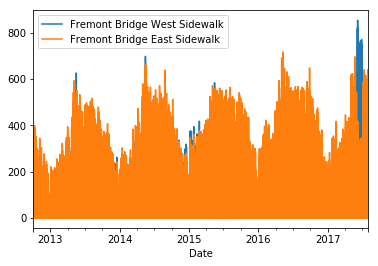

In [55]:
%matplotlib inline
data.plot();

## 数据重采样，按周进行计算

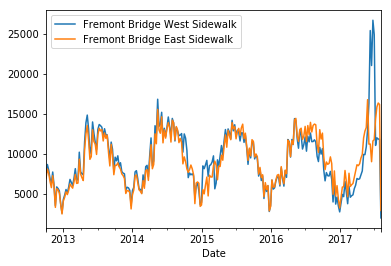

In [56]:
%matplotlib inline
data.resample('w').sum().plot(); #一周统计总量

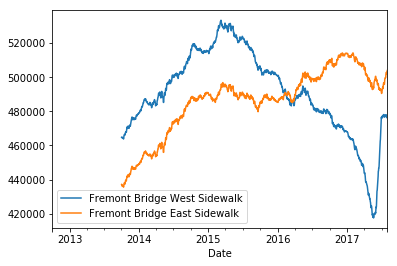

In [57]:
data.resample('D').sum().rolling(365).sum().plot(); #数据重采样：按天进行重采样，滑动窗口问哦365D

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

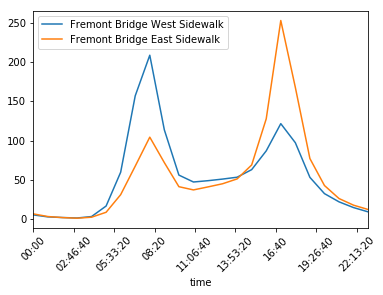

In [58]:
import matplotlib.pyplot as plt
data.groupby(data.index.time).mean().plot();
plt.xticks(rotation=45) #横坐标轴进行旋转45度

In [59]:
# pivot table
data.columns =['West', 'East']
data ['Total'] =data['West']+data['East']
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date) #重新绘制表格
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [51]:
len(data['West']+data['East'])

42312

In [42]:
# print(data.index.time,'\n', data.index)#按时间，按索引进行索引
data.columns

Index(['Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk'], dtype='object')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

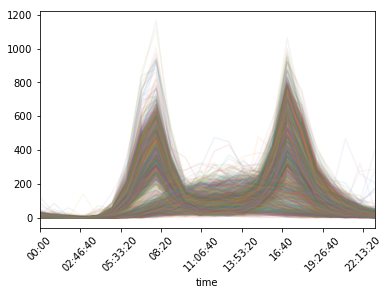

In [43]:
pivoted.plot(legend=False, alpha =0.08);
plt.xticks(rotation=45)

In [8]:
pivoted.shape

(24, 1763)

In [9]:
X = pivoted.fillna(0).T.values #对缺失值填充为0
X.shape

(1763, 24)

In [10]:
from  sklearn.decomposition import PCA
X2 = PCA(2).fit_transform(X)
X2.shape

(1763, 2)

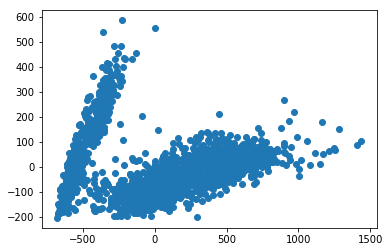

In [11]:
plt.scatter(X2[:,0],X2[:,1])

# 使用高斯混合模型

In [45]:
from sklearn.mixture import GaussianMixture 
gmm =GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict_proba(X) #打印属于某一类的概率
labels

array([[7.61038928e-21, 1.00000000e+00],
       [6.50929658e-25, 1.00000000e+00],
       [1.00000000e+00, 2.00824097e-10],
       ...,
       [5.55850260e-12, 1.00000000e+00],
       [2.46554849e-16, 1.00000000e+00],
       [9.99990545e-01, 9.45522284e-06]])

In [13]:
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

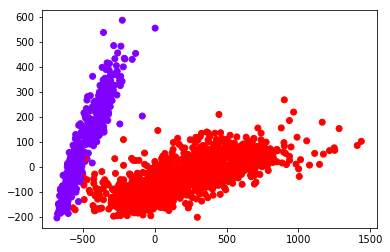

In [14]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow') 
#plt.colorbar()

## 对分出来的两个类别查看其分布状况

Text(0.5, 1.0, 'Red Cluster')

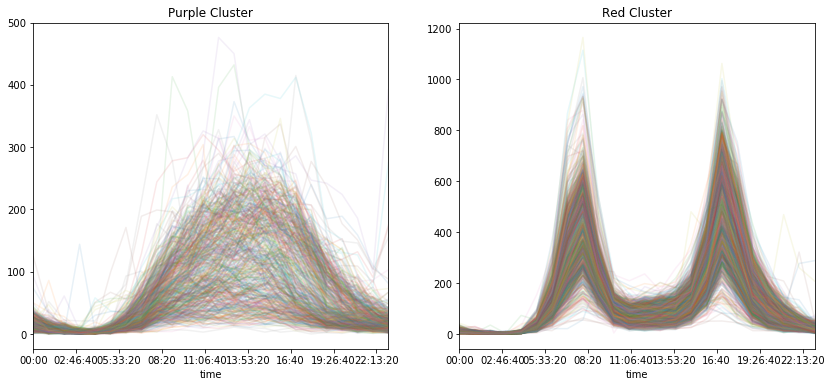

In [15]:
fig, ax = plt.subplots(1, 2, figsize =(14, 6))
                      
pivoted.T[labels == 0].T.plot(legend =False, alpha =0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend =False, alpha =0.1, ax=ax[1])

ax[0].set_title ('Purple Cluster')
ax[1].set_title ('Red Cluster')

In [46]:
pivoted.shape

(24, 1763)

## K-means与GMM的对比

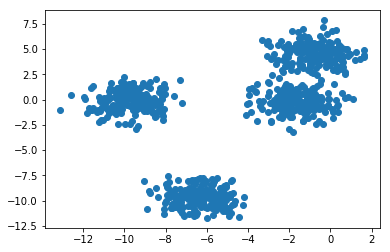

In [16]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=800, centers=4, random_state=11)
plt.scatter(X[:, 0], X[:, 1]);

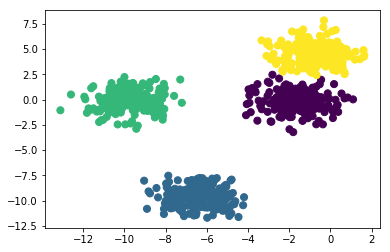

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

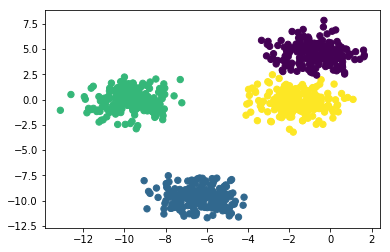

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

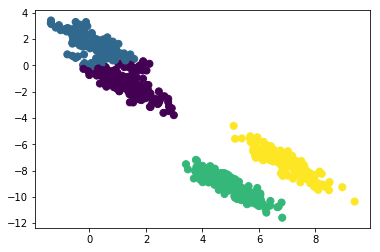

In [20]:
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

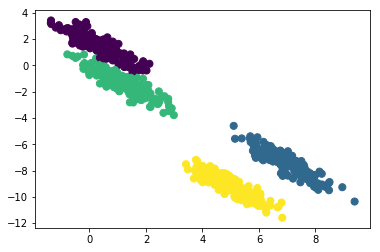

In [21]:
gmm = GaussianMixture(n_components=4)        
gmm.fit(X_stretched)
y_gmm = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_gmm, s=50, cmap='viridis')